In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Get image paths
image_paths = ['00{}.jpg'.format(x) for x in range(3)]
print("imagePaths: " + str(image_paths))

n_images = len(image_paths)

# Read images from paths
images = [cv2.imread(image_path) for image_path in image_paths]

imagePaths: ['000.jpg', '001.jpg', '002.jpg']


In [42]:
import face_detect as fd

# Get faces from all images
faces = []
print("Starting to search the images for faces...")
for i, img in enumerate(images):
    if i != 0:
        print("...still running...")
    img_faces = fd.find_faces_using_cascades(img)
    faces.append(img_faces)
    print("Found {} faces in image {}!".format(len(img_faces), image_paths[i]))

Starting to search the images for faces...
Found 156 faces in image 000.jpg!
...still running...
Found 77 faces in image 001.jpg!
...still running...
Found 3 faces in image 002.jpg!


In [48]:
# Generate annotated version of images with rectangles drawn around detected faces

images_anno = []
for i, img in enumerate(images):
    img_anno = images[i]
    for (x, y, w, h) in faces[i]:
        cv2.rectangle(img_anno, (x, y), (x + w, y + h), (255, 170, 0), 10)
    images_anno.append(img_anno)

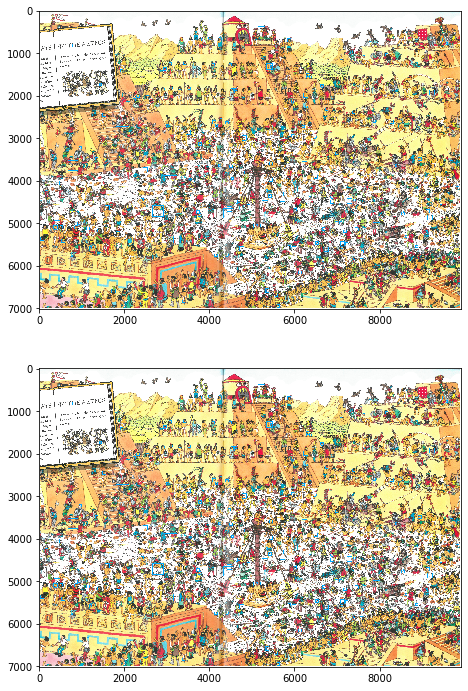

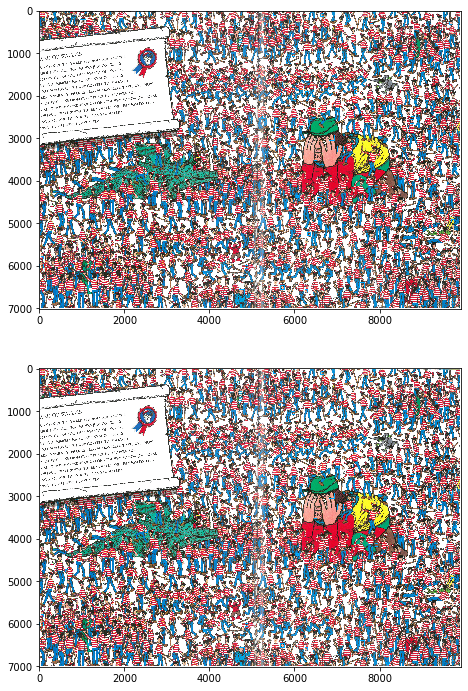

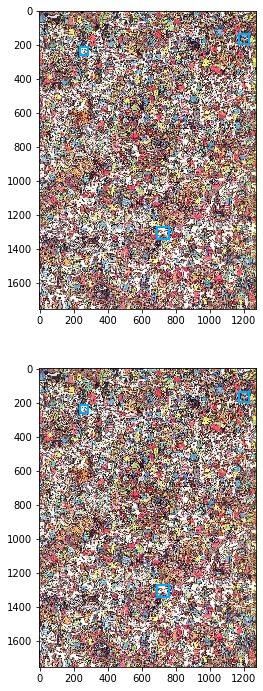

In [49]:
# Plot original and annotated images and save annotated images to disk

for i in range(n_images):
    
    rgb_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2*n_images+1, 1, i*2+1)
    plt.imshow(rgb_img)
    
    rgb_img_anno = cv2.cvtColor(images_anno[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2*n_images+1, 1, i*2+2)
    plt.imshow(rgb_img_anno)
    
    plt.show()
    
    cv2.imwrite("anno_" + image_paths[i], images_anno[i])